# Modelos de mézclas de Gaussianas

xxxxxxxx

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

### Preliminares 

En la siguiente celda se realizan los siguientes pasos:
1. carga de módulos genéricos
2. leer los datos y cargarlos en dataframes
2. extraer características
2. separar en TRAIN y VALID
2. seleccionar características y escalar TRAIN a [0,1]

In [1]:
#-[1]. Load data from CSV and put all in a single dataframe 'FullSet'

import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('../../MyUtils/')
import MyUtils as my
seed = 1234 #<- random generator seed (comment to get randomness)

#-[2]. Load data from CSV in different dataframes: 'FullSet_0' and 'FullSet_1'

FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)

#-[3]. Convert each 'FullSet' of pixels into the set 'X_full' of features and get the set 'Y_full' of labels

theta = 0.5
X0_full = my.mnist_features( FullSet_0, theta=theta )
Y0_full = pd.DataFrame({'label':np.zeros(X0_full.shape[0])})
X1_full = my.mnist_features( FullSet_1, theta=theta )
Y1_full = pd.DataFrame({'label':np.ones(X1_full.shape[0])})

#-[4]. Split X_full into TRAIN and TEST in a single Stratified split

valid_size = 0.2
X0_train, Y0_train, X0_valid, Y0_valid = \
   my.single_stratified_split( X0_full,Y0_full, test_size=valid_size, random_state=seed)
X1_train, Y1_train, X1_valid, Y1_valid = \
   my.single_stratified_split( X1_full,Y1_full, test_size=valid_size, random_state=seed)

#-[5]. Select the features and fit a scaler to [0,1]

from sklearn.preprocessing import MinMaxScaler

feat_selec= ['width','height']
scaler = MinMaxScaler()
data_0 = scaler.fit_transform(X0_train[feat_selec])
labels_0 = Y0_train.values.ravel()   
data_1 = scaler.fit_transform(X1_train[feat_selec])
labels_1 = Y1_train.values.ravel()   

#---> data_0(1) and labels_0(1)  are now numpy arrays ready to train a machine !!

## GMM

Más en [*xxxxxxx*](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)

#### Entrenar

In [2]:
# --- LEARN  GMM -----------------------
from sklearn.mixture import GaussianMixture

N_components = 3    #<-- number of Gaussian components
cov_type = 'full'   #<-- choices are:  ‘full’ , ‘tied’ , ‘diag’ , ‘spherical’
init_params='random'#<-- every time begins at a different point
max_iter=1000       #<-- number of iterations before stop (if not convergence)

gmm_0 = GaussianMixture(n_components=N_components, \
                        covariance_type=cov_type, init_params=init_params, max_iter=max_iter)
gmm_1 = GaussianMixture(n_components=N_components, \
                        covariance_type=cov_type, init_params=init_params, max_iter=max_iter)
gmm_0.fit(data_0,labels_0)
gmm_1.fit(data_1,labels_1)


GaussianMixture(init_params='random', max_iter=1000, n_components=3)

#### Predecir

In [3]:
#--parameters of this cell
cmap = 'summer' # other choices are: 'jet' 'hot' 'cool' 'spring' 'summer' 'winter'
unit_interv = [0,1,0,1]
Ngrid = 100

#--take Ngrid x Ngrid equally spaced points in [0,1]x[0,1]
rangeX = np.linspace(0,1,Ngrid)
rangeY = np.linspace(0,1,Ngrid)
xx,yy = np.meshgrid(rangeX,rangeY)
grid_data = np.hstack( (xx.reshape([xx.size,1]),    \
                        yy.reshape([yy.size,1]) ) )

#--predict the label 
y_score0 = np.exp(gmm_0.score_samples(grid_data))
y_score0 = y_score0.reshape([Ngrid,Ngrid])
y_score1 = np.exp(gmm_1.score_samples(grid_data))
y_score1 = y_score1.reshape([Ngrid,Ngrid])
yhat = y_score0>y_score1

#### Visualizar

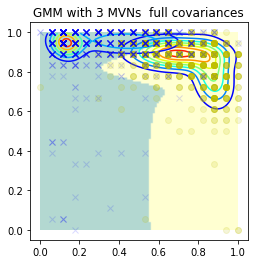

In [4]:
plt.contour(y_score0, origin="lower", extent=unit_interv, cmap='jet', alpha=1)
plt.contour(y_score1, origin="lower", extent=unit_interv, cmap='jet', alpha=1)

plt.imshow(yhat, origin="lower", extent=unit_interv, cmap=cmap, alpha=0.3)

plt.plot(data_0[:,0], data_0[:,1], 'yo', alpha=.15)
plt.plot(data_1[:,0], data_1[:,1], 'bx', alpha=.15)

strTitle = "GMM with %d MVNs  %s covariances" %(N_components, cov_type)
plt.title(strTitle)
plt.axis([-0.05,1.05,-0.05,1.05])

plt.show()